# Project: Soccer
![Section Title: Soccer](title_pict/soccer2.png)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Import Data
In this project, the [soccer-data-api](https://pypi.org/project/soccer-data-api/) package is used to import 
soccer data  from https://www.sports-reference.com/

Available leagues:
- English Premier League
- Spanish La Liga
- French Ligue 1
- German Bundesliga
- Italian Serie A
- Dutch Eredivisie
- Russian Premier League
- English Championship.

To install the package, use `!pip install soccer-data-api`.

In [4]:
# !pip install soccer-data-api

In [5]:
from soccer_data_api import SoccerDataAPI
soccer_data = SoccerDataAPI()

- The *soccer_data* object contains methods specific to each league.

In [74]:
type(soccer_data) 

soccer_data_api.soccer_api.SoccerDataAPI

In [6]:
# methods
dir(soccer_data)[-9:]

['bundesliga',
 'english_championship',
 'english_premier',
 'eredivisie',
 'get_data',
 'la_liga',
 'ligue_1',
 'russian_premier',
 'serie_a']

In [7]:
soccer_data.bundesliga()

[{'team': 'Bayern Munich',
  'pos': '1',
  'points': '48',
  'matches_played': '19',
  'wins': '15',
  'draws': '15',
  'losses': '1',
  'goals_for': '58',
  'goals_against': '16',
  'goal_diff': '+42',
  'top_scorer': 'Harry Kane - 17'},
 {'team': 'Leverkusen',
  'pos': '2',
  'points': '42',
  'matches_played': '19',
  'wins': '12',
  'draws': '12',
  'losses': '1',
  'goals_for': '46',
  'goals_against': '26',
  'goal_diff': '+20',
  'top_scorer': 'Patrik Schick - 13'},
 {'team': 'Eint Frankfurt',
  'pos': '3',
  'points': '37',
  'matches_played': '19',
  'wins': '11',
  'draws': '11',
  'losses': '4',
  'goals_for': '44',
  'goals_against': '26',
  'goal_diff': '+18',
  'top_scorer': 'Omar Marmoush - 15'},
 {'team': 'Stuttgart',
  'pos': '4',
  'points': '32',
  'matches_played': '19',
  'wins': '9',
  'draws': '9',
  'losses': '5',
  'goals_for': '36',
  'goals_against': '28',
  'goal_diff': '+8',
  'top_scorer': 'Ermedin Demirović - 8'},
 {'team': 'RB Leipzig',
  'pos': '5',
  '

## English Premier League
Each league is represented as a list.

In [9]:
ep = soccer_data.english_premier()
type(ep)

list

In [10]:
len(ep)

20

- The list elements consist of dictionaries for each team, ordered by their ranking.

In [12]:
ep

[{'team': 'Liverpool',
  'pos': '1',
  'points': '53',
  'matches_played': '23',
  'wins': '16',
  'draws': '16',
  'losses': '1',
  'goals_for': '54',
  'goals_against': '21',
  'goal_diff': '+33',
  'top_scorer': 'Mohamed Salah - 19'},
 {'team': 'Arsenal',
  'pos': '2',
  'points': '47',
  'matches_played': '23',
  'wins': '13',
  'draws': '13',
  'losses': '2',
  'goals_for': '44',
  'goals_against': '21',
  'goal_diff': '+23',
  'top_scorer': 'Kai Havertz - 8'},
 {'team': "Nott'ham Forest",
  'pos': '3',
  'points': '44',
  'matches_played': '23',
  'wins': '13',
  'draws': '13',
  'losses': '5',
  'goals_for': '33',
  'goals_against': '27',
  'goal_diff': '+6',
  'top_scorer': 'Chris Wood - 14'},
 {'team': 'Manchester City',
  'pos': '4',
  'points': '41',
  'matches_played': '23',
  'wins': '12',
  'draws': '12',
  'losses': '6',
  'goals_for': '47',
  'goals_against': '30',
  'goal_diff': '+17',
  'top_scorer': 'Erling Haaland - 18'},
 {'team': 'Newcastle Utd',
  'pos': '5',
  '

- Each team is represented as a dictionary.

In [13]:
ep[0]

{'team': 'Liverpool',
 'pos': '1',
 'points': '53',
 'matches_played': '23',
 'wins': '16',
 'draws': '16',
 'losses': '1',
 'goals_for': '54',
 'goals_against': '21',
 'goal_diff': '+33',
 'top_scorer': 'Mohamed Salah - 19'}

- For each team, the following information is provided.

In [15]:
ep[0].keys()

dict_keys(['team', 'pos', 'points', 'matches_played', 'wins', 'draws', 'losses', 'goals_for', 'goals_against', 'goal_diff', 'top_scorer'])

### Most Scorer Team

In [17]:
max_goals_for = 0
max_goals_for_team = ''

for t in ep:
    if int(t['goals_for']) > max_goals_for:
        max_goals_for = int(t['goals_for'])
        max_goals_for_team = t['team']

print(f'Team         : {max_goals_for_team}')
print(f'Max Goals For: {max_goals_for}')

Team         : Liverpool
Max Goals For: 54


### Least Scorer Team

In [19]:
import numpy as np

min_goals_for = np.inf
min_goals_for_team = ''

for t in ep:
    if int(t['goals_for']) < min_goals_for:
        min_goals_for = int(t['goals_for'])
        min_goals_for_team = t['team']

print(f'Team         : {min_goals_for_team}')
print(f'Min Goals For: {min_goals_for}')

Team         : Southampton
Min Goals For: 16


### The most goals scored against 

In [21]:
max_goals_against = 0
max_goals_against_team = ''

for t in ep:
    if int(t['goals_against']) > max_goals_against:
        max_goals_against = int(t['goals_against'])
        max_goals_against_team = t['team']

print(f'Team             : {max_goals_against_team}')
print(f'Max Goals Against: {max_goals_against}')

Team             : Southampton
Max Goals Against: 53


### Top Scorer Player

In [23]:
top_score = 0
top_score_player = ''

for t in ep:
    ts = t['top_scorer']
    if int(ts[ts.rfind('-')+1:]) > top_score:
        top_score = int(ts[ts.find('-')+1:])
        top_score_player = ts[:ts.find('-')]

print(f'Top Scorer : {top_score_player}')
print(f'Top Score  : {top_score}')

Top Scorer : Mohamed Salah 
Top Score  : 19


### Equal Scorer Players in a Team

In [25]:
top_score = 0
top_score_player = ''

for t in ep:
    ts = t['top_scorer']
    if ts.find(',') != -1:
        print(ts)

Tomáš Souček, Jarrod Bowen - 5
Adam Armstrong, Jan Bednarek... - 2


### List of Teams and Points

In [27]:
teams, points = [], []

for t in ep:
    teams.append(t['team'])
    points.append(int(t['points']))

### Bar graph of points

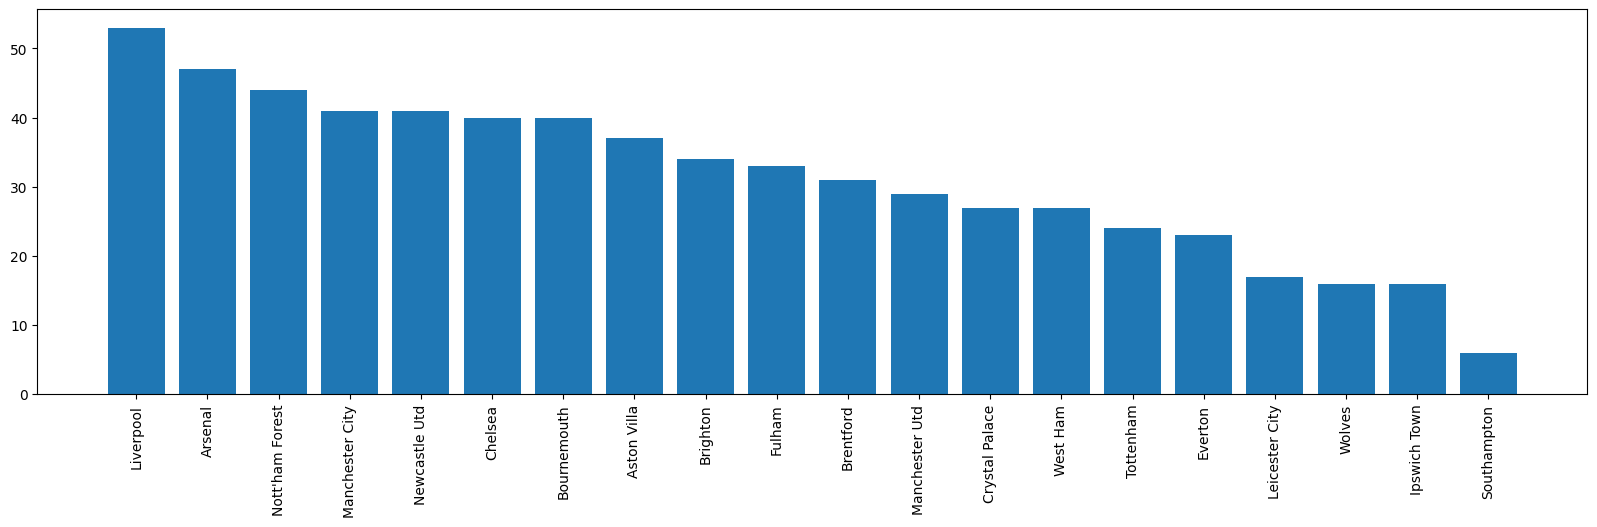

In [29]:
plt.figure(figsize=(20,5))
plt.bar(teams, points)
plt.xticks(rotation=90);

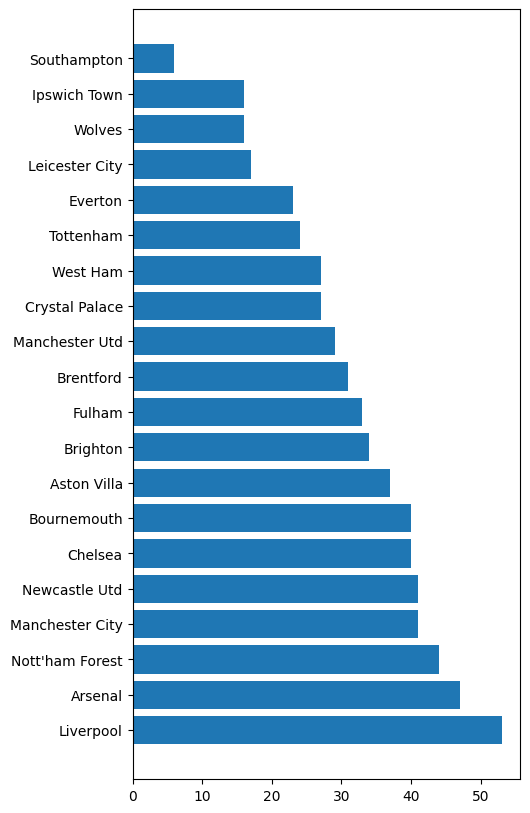

In [30]:
plt.figure(figsize=(5,10))
plt.barh( teams, points);

### Check Matches Played
- There is an issue with the data.
- The number of draws is incorrect.

In [32]:
for t in ep:
    if int(t['matches_played']) != int(t['wins']) + int(t['draws']) +int(t['losses']):
        print(t['team'], int(t['matches_played']), int(t['wins']), int(t['draws']), int(t['losses']) )

Liverpool 23 16 16 1
Arsenal 23 13 13 2
Nott'ham Forest 23 13 13 5
Manchester City 23 12 12 6
Newcastle Utd 23 12 12 6
Chelsea 23 11 11 5
Bournemouth 23 11 11 5
Aston Villa 22 10 10 6
Brighton 23 8 8 5
Fulham 23 8 8 6
Brentford 23 9 9 10
Manchester Utd 22 8 8 10
Crystal Palace 23 6 6 8
West Ham 23 7 7 10
Tottenham 23 7 7 13
Everton 23 5 5 9
Leicester City 23 4 4 14
Ipswich Town 23 3 3 13
Southampton 23 1 1 19


## All Leagues
The following is the list of all the leagues available in the package.

In [34]:
leagues = [soccer_data.english_premier(),
soccer_data.la_liga(),
soccer_data.ligue_1(),
soccer_data.bundesliga(),
soccer_data.serie_a(),
soccer_data.eredivisie(),
soccer_data.russian_premier(),
soccer_data.english_championship()]

The following is the dictionary of all the leagues available in the package.

In [107]:
leagues[1]

[{'team': 'Real Madrid',
  'pos': '1',
  'points': '49',
  'matches_played': '21',
  'wins': '15',
  'draws': '15',
  'losses': '2',
  'goals_for': '50',
  'goals_against': '20',
  'goal_diff': '+30',
  'top_scorer': 'Kylian Mbappé - 15'},
 {'team': 'Atlético Madrid',
  'pos': '2',
  'points': '45',
  'matches_played': '21',
  'wins': '13',
  'draws': '13',
  'losses': '2',
  'goals_for': '35',
  'goals_against': '14',
  'goal_diff': '+21',
  'top_scorer': 'Alexander Sørloth - 8'},
 {'team': 'Barcelona',
  'pos': '3',
  'points': '42',
  'matches_played': '21',
  'wins': '13',
  'draws': '13',
  'losses': '5',
  'goals_for': '59',
  'goals_against': '24',
  'goal_diff': '+35',
  'top_scorer': 'Robert Lewandowski - 17'},
 {'team': 'Athletic Club',
  'pos': '4',
  'points': '40',
  'matches_played': '21',
  'wins': '11',
  'draws': '11',
  'losses': '3',
  'goals_for': '31',
  'goals_against': '18',
  'goal_diff': '+13',
  'top_scorer': 'Oihan Sancet - 7'},
 {'team': 'Villarreal',
  'pos

### Top Scorer Player

In [119]:
top_score = 0
top_score_player = ''

for league in leagues:
    for t in league:
        ts = t['top_scorer']
        name = ts[:ts.find('-')]
        score = int(ts[ts.rfind('-')+1:])
        if (score > top_score) & (len(name)>0):
            top_score = score
            top_score_player = name

print(f'Top Scorer : {top_score_player}')
print(f'Top Score  : {top_score}')

Top Scorer : Mohamed Salah 
Top Score  : 19


### The Team with Highest and Lowest Goal Differences

In [40]:
highest_goal_diff = 0
highest_goal_diff_team = ''
lowest_goal_diff = np.inf
lowest_goal_diff_team = ''


for league in leagues:
    for t in league:
        if int(t['goal_diff']) > highest_goal_diff:
            highest_goal_diff = int(t['goal_diff'])
            highest_goal_diff_team = t['team']
        if int(t['goal_diff']) < lowest_goal_diff:
            lowest_goal_diff = int(t['goal_diff'])
            lowest_goal_diff_team = t['team']

print(f'Highest Goal Diff : {highest_goal_diff}  ---  Team: {highest_goal_diff_team }')
print(f'Lowest  Goal Diff : {lowest_goal_diff}   ---  Team: {lowest_goal_diff_team }')

Highest Goal Diff : 45  ---  Team: PSV Eindhoven
Lowest  Goal Diff : -37   ---  Team: Southampton


### The League with Most Goal Scored 

In [42]:
max_total_goal = 0
max_total_goal_league = ''

for name, league in leagues_dict.items():
    total = 0
    for t in league:
        total += int(t['goals_for'])
    if total > max_total_goal:
        max_total_goal = total       
        max_total_goal_league = name

print(f'Most Goal Scored League : {max_total_goal_league}')
print(f'Maximum Total Goal      : {max_total_goal}')

Most Goal Scored League : english_premier
Maximum Total Goal      : 691


### The Team with Highest Points Per Game  

In [44]:
max_point_pg = 0
max_point_pg_team = ''

for league in leagues:
    for t in league:
        ppg = int(t['points'])/int(t['matches_played'])
        if ppg > max_point_pg:
            max_point_pg = ppg
            max_point_pg_team = t['team']

print(f'Max Point Per Game : {max_point_pg}')
print(f'Team               : {max_point_pg_team}')

Max Point Per Game : 2.5789473684210527
Team               : PSV Eindhoven


### The Teams with Highest Points Per Game  for Each League

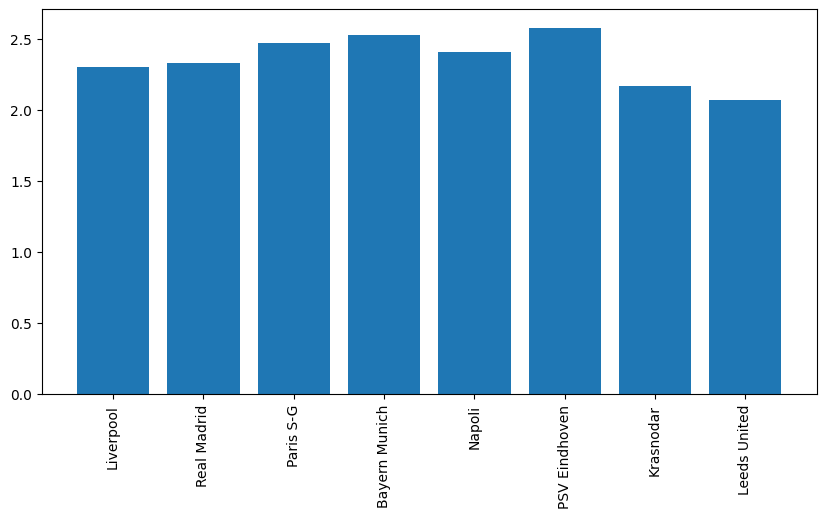

In [46]:
max_point_pg_list = []
max_point_pg_team_list = []


for league in leagues:
    max_point_pg = 0
    max_point_pg_team = ''
    for t in league:
        ppg = int(t['points'])/int(t['matches_played'])
        if ppg > max_point_pg:
            max_point_pg = ppg
            max_point_pg_team = t['team']
    
    max_point_pg_list.append(max_point_pg)
    max_point_pg_team_list.append(max_point_pg_team)
    
plt.figure(figsize=(10,5))
plt.bar(max_point_pg_team_list, max_point_pg_list)
plt.xticks(rotation=90);

## Future work
- Store all goal differences as integers in a list (pay attention to the +/- signs).
- Store the number of draws for each team in a list.
- Store the names of all top scorers in a list.
- Store the number of goals scored by each top scorer in a list.
- Identify the team with the largest point difference from the second-highest team.